In [1]:
%ls

 Activity5.ipynb             Clase6.ipynb           README.md
 adult.csv                   coches.csv             reg_data.csv
 airline_data.csv            cwurData.csv           requirements.txt
 antropometria00.csv         data.csv               sample_pivot.csv
 antropometria-dataset.csv   datasets/              TAREA5-2-2.ipynb
 Book3.csv                   headbrain.csv          tips.csv
 Canada.xlsx                 mic2.xlsx              Untitled.ipynb
 Cartwheeldata.csv           movies.csv             weight-height.csv
 census.csv                  nhanes_2015_2016.csv
'Clase5 (13).ipynb'          pokemon.csv


In [2]:
%ls datasets/

adult.csv                  census.csv     nhanes_2015_2016.csv
airline_data.csv           coches.csv     pokemon.csv
antropometria00.csv        cwurData.csv   reg_data.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  tips.csv
Canada.xlsx                mic2.xlsx      weight-height.csv
Cartwheeldata.csv          movies.csv


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
path = 'datasets/mic2.xlsx'
df =  pd.read_excel(path, engine = 'openpyxl')
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree


In [10]:
def categorizar(x):
    if (0<= x <=19):
        return "<20"
    elif (20<= x <=29):
        return "<30"
    elif (30<= x <=39):
        return "<40"
    else: 
        return ">=40"
    
df['AgeGP']= df.apply(
    lambda tbl: categorizar(tbl['Age']),
    axis=1)

In [11]:
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,<40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,<30
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,>=40
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,<30
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,<30


In [12]:
categorizar(-5)

'>=40'

In [13]:
df.columns.tolist()

['Age',
 'Sex',
 'Ocupation',
 'Monthly income ',
 'Price',
 'Quality',
 'Quantity',
 'Availability',
 'Taste',
 'Flavours',
 'Customer relation',
 'Customer services',
 'Texture',
 'Size',
 'Overal satisfaction',
 'Consistency',
 'Factor',
 'Frowned',
 'reason',
 'Popular',
 'My favorite',
 'Kind',
 'Preference',
 'Recommend',
 'AgeGP']

## cuantas personas hay en cada categoria de "AgeGP" y cuantos de cada genero M/F??

In [14]:
counts = df['AgeGP'].value_counts()
counts

<30     31
<20      8
<40      8
>=40     3
Name: AgeGP, dtype: int64

In [15]:
type(counts)

pandas.core.series.Series

In [16]:
counts = df['AgeGP'].value_counts()

counts = counts.to_frame()
type(counts)

pandas.core.frame.DataFrame

In [17]:
counts

,AgeGP
<30,31
<20,8
<40,8
>=40,3


In [18]:
## to sort AgeGP in order
counts =  counts.reindex(['<20','<30','<40','>=40'])

counts

,AgeGP
<20,8
<30,31
<40,8
>=40,3


In [19]:
#df[percent] = (df['column_name'] / df['column_name'].sum()) * 100
counts['pct'] = (counts.iloc[:, -1]/counts.iloc[:, -1].sum(axis=0))*100


In [20]:
counts.head()

,AgeGP,pct
<20,8,16.0
<30,31,62.0
<40,8,16.0
>=40,3,6.0


In [21]:
counts = counts.reset_index()
counts

,index,AgeGP,pct
0,<20,8,16.0
1,<30,31,62.0
2,<40,8,16.0
3,>=40,3,6.0


In [22]:
counts = counts.rename({'index': 'Age_Group'}, axis=1)
counts

,Age_Group,AgeGP,pct
0,<20,8,16.0
1,<30,31,62.0
2,<40,8,16.0
3,>=40,3,6.0


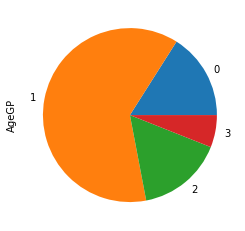

In [23]:
counts['AgeGP'].plot(kind='pie')

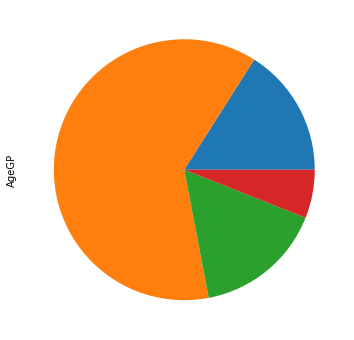

In [24]:
counts['AgeGP'].plot(kind='pie',
                    figsize= (15,6),
                    labels =None)
plt.show()

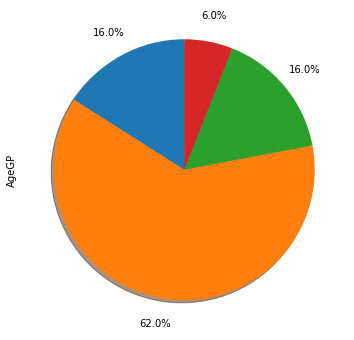

In [25]:
counts['AgeGP'].plot(kind='pie',
                    figsize= (15,6),
                    labels =None,
                    autopct = '%1.1f%%',
                    pctdistance = 1.2,
                    startangle = 90,
                    shadow = True,)
plt.show()

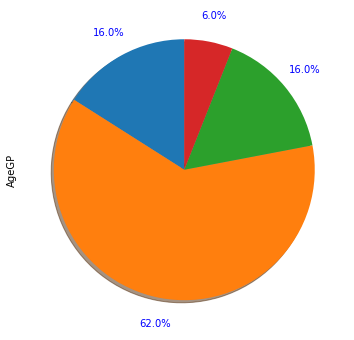

In [26]:
counts['AgeGP'].plot(kind='pie',
                    figsize= (15,6),
                    labels =None,
                    autopct = '%1.1f%%',
                    textprops = {'color':'b'},
                    pctdistance = 1.2,
                    startangle = 90,
                    shadow = True,)
plt.show()

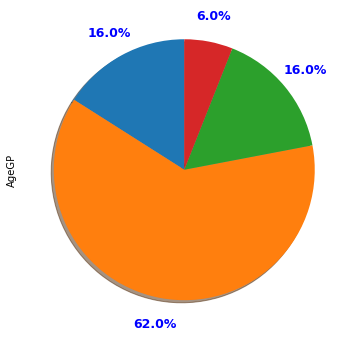

In [27]:
counts['AgeGP'].plot(kind='pie',
                    figsize= (15,6),
                    labels =None,
                    autopct = '%1.1f%%',
                    textprops = {'color':'b', 'weight':'bold', 'fontsize': 12.5},
                    pctdistance = 1.2,
                    startangle = 90,
                    shadow = True,)
plt.show()

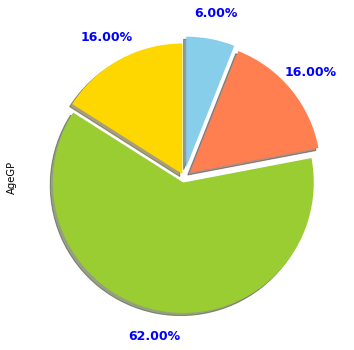

In [28]:
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'lightgreen', 'pink']
explode_list = [0.03,0.04, 0.06, 0.08]

counts['AgeGP'].plot(kind='pie',
                    figsize= (15,6),
                    labels = None,
                    autopct = '%1.2f%%',
                    textprops = {'color':'b', 'weight':'bold', 'fontsize': 12.5},
                    pctdistance = 1.2,
                    startangle = 90,
                    shadow = True,
                    colors = color_list,
                    explode = explode_list)
plt.show()

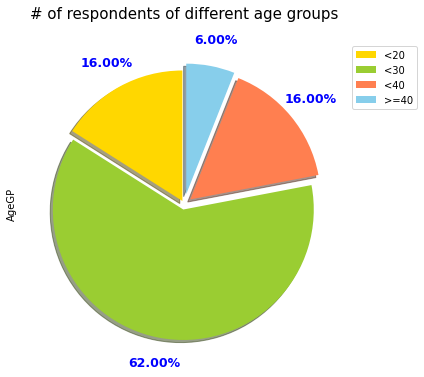

In [29]:
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'lightgreen', 'pink']
explode_list = [0.03,0.04, 0.06, 0.08]

counts['AgeGP'].plot(kind='pie',
                    figsize= (15,6),
                    labels = None,
                    autopct = '%1.2f%%',
                    textprops = {'color':'b', 'weight':'bold', 'fontsize': 12.5},
                    pctdistance = 1.2,
                    startangle = 90,
                    shadow = True,
                    colors = color_list,
                    explode = explode_list)
plt.legend(labels= counts.Age_Group, bbox_to_anchor= (1.0, 1.0))
plt.title('# of respondents of different age groups', y= 1.05, fontsize = 15)
plt.show()

<BarContainer object of 4 artists>

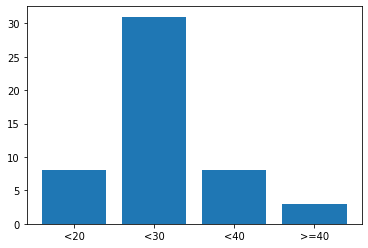

In [30]:
plt.bar(list(counts['Age_Group']),
        list(counts['AgeGP']))

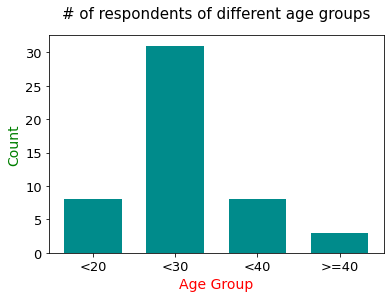

In [31]:
plt.bar(list(counts['Age_Group']),
        list(counts['AgeGP']),
       width= 0.7,
       color= 'darkcyan')


plt.xlabel('Age Group', fontweight = 'regular', color = 'red', fontsize= '14', horizontalalignment = 'center')
plt.ylabel('Count', fontweight = 'regular', color = 'green', fontsize= '14', horizontalalignment = 'center')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.title('# of respondents of different age groups', y= 1.05, fontsize = 15)
plt.show()

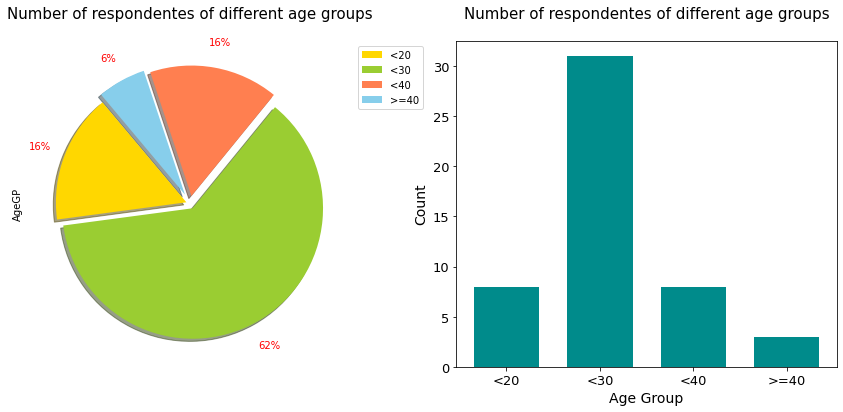

In [32]:
plt.subplot(1,2,1)

color_list=['gold','yellowgreen','coral','skyblue','lightgreen','pink']
explode_list=[0.03,0.04,0.06,0.08,]
counts['AgeGP'].plot(kind='pie',figsize=(15,6),labels=None,autopct='%1.0f%%',startangle=130,shadow=True,
                     pctdistance=1.2,
                    textprops={'color':'r'},
                    colors=color_list,
                    explode=explode_list)
plt.legend(labels=counts.Age_Group,bbox_to_anchor=(1.0,1.0))
plt.title('Number of respondentes of different age groups',y=1.05,fontsize=15);

plt.subplot(1,2,2)
plt.bar(list(counts['Age_Group']),list(counts['AgeGP']),
       width=0.7,color='darkcyan')
plt.xlabel('Age Group',fontweight='regular',color='black',fontsize=14,horizontalalignment='center')
plt.ylabel('Count',fontweight='regular',color='black',fontsize=14,horizontalalignment='center')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of respondentes of different age groups',y=1.05,fontsize=15)
plt.show()